<a href="https://colab.research.google.com/github/aleksperic/Basketball-player-stats/blob/master/Basketball_player_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/players_stats_by_season_full_details.csv')

In [3]:
df.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school'],
      dtype='object')

columns:
*   League
*   Season
*   Stage - Internacional, NBA: Playoffs or Regular season
*   Player
*   Team
*   GP - Games Played
*   MIN - Minutes played
*   FGM - Field goals made
*   FGA - Field goals attempts
*   3PM - Three points made
*   3PA - Three points attemptsa
*   FTM - Free throws made
*   FTA - Free throws attempts
*   TOV - Turnovers
*   PF - Personal fouls
*   ORB - Offensive rebounds
*   DRB - Defensive rebounds
*   REB - Rebounds
*   AST - Assists
*   STL - Steals
*   BLK - Blocks
*   PTS - Points
*   birth_year
*   birth_month
*   birth_day
*   height
*   height_cm
*   weight
*   weight_kg
*   nationality
*   high_school



In [4]:
df.shape

(36950, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36950 entries, 0 to 36949
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       36950 non-null  object 
 1   Season       36950 non-null  object 
 2   Stage        36950 non-null  object 
 3   Player       36950 non-null  object 
 4   Team         36950 non-null  object 
 5   GP           36950 non-null  int64  
 6   MIN          36950 non-null  float64
 7   FGM          36950 non-null  int64  
 8   FGA          36950 non-null  int64  
 9   3PM          36950 non-null  int64  
 10  3PA          36950 non-null  int64  
 11  FTM          36950 non-null  int64  
 12  FTA          36950 non-null  int64  
 13  TOV          36950 non-null  int64  
 14  PF           36950 non-null  int64  
 15  ORB          36950 non-null  int64  
 16  DRB          36950 non-null  int64  
 17  REB          36950 non-null  int64  
 18  AST          36950 non-null  int64  
 19  STL 

In [6]:
#koji igrac je dao najvise poena
#koji tim je postigao najvise poena
#koji igrac je odigrao najvise utakmica
#koji igrac je odigrao najvise minuta
#procenat postignutih 3 poena u odnosu na pokusaje (po timovima)
#procenat postignutih poena u odnosu na ukradene lopte (po timovima)
#procenat postignutih poena u odnosu na asistencije (po timovima)
#skokovi u odnosu na visinu igraca (po timovima)
#postignuti poenu u odnosu na ofanzivne skokove

In [7]:
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2009 - 2010,Regular_Season,Kevin Durant,OKC,82,3239.3,794,1668,128,351,756,840,271,171,105,518,623,231,112,84,2472,1988.0,Sep,"Sep 29, 1988",6-9,206.0,240.0,109.0,United States,Montrose Christian School
1,NBA,2009 - 2010,Regular_Season,LeBron James,CLE,76,2965.6,768,1528,129,387,593,773,261,119,71,483,554,651,125,77,2258,1984.0,Dec,"Dec 30, 1984",6-8,203.0,250.0,113.0,United States,St. Vincent St. Mary High School
2,NBA,2009 - 2010,Regular_Season,Dwyane Wade,MIA,77,2792.4,719,1511,73,243,534,702,252,181,107,266,373,501,142,82,2045,1982.0,Jan,"Jan 17, 1982",6-4,193.0,220.0,100.0,United States,Harold L. Richards High School
3,NBA,2009 - 2010,Regular_Season,Dirk Nowitzki,DAL,81,3038.8,720,1496,51,121,536,586,149,208,80,540,620,218,70,79,2027,1978.0,Jun,"Jun 19, 1978",7-0,213.0,245.0,111.0,Germany,NaN
4,NBA,2009 - 2010,Regular_Season,Kobe Bryant,LAL,73,2835.4,716,1569,99,301,439,541,233,187,78,313,391,365,113,20,1970,1978.0,Aug,"Aug 23, 1978",6-6,198.0,212.0,96.0,United States,Lower Merion High School


In [8]:
df.describe()

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg
count,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36774.000000,36912.000000,33919.000000,33919.000000
mean,31.401083,781.178506,117.838268,254.699648,30.616969,87.107876,57.238484,77.404980,49.160162,72.323978,35.362544,94.218106,129.580650,65.333424,27.635372,10.383735,323.544060,1987.492549,197.165827,209.275332,94.955836
std,16.112989,470.295971,91.730585,191.015086,30.658528,80.451297,53.446822,68.662186,34.383808,40.288340,35.028300,78.806687,109.112397,67.823130,20.710504,16.272083,248.591981,4.913384,8.630686,25.669331,11.643626
min,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1968.000000,160.000000,130.000000,59.000000
25%,22.000000,476.000000,57.000000,131.000000,7.000000,25.000000,23.000000,32.000000,26.000000,44.000000,13.000000,44.000000,59.000000,24.000000,13.000000,1.000000,160.000000,1984.000000,191.000000,190.000000,86.000000
50%,31.000000,726.000000,99.000000,217.000000,23.000000,71.000000,44.000000,61.000000,43.000000,69.000000,25.000000,75.000000,102.000000,45.000000,23.000000,5.000000,275.000000,1988.000000,198.000000,207.000000,94.000000
75%,38.000000,983.200000,151.000000,323.000000,45.000000,126.000000,75.000000,102.000000,65.000000,93.000000,47.000000,120.000000,166.000000,84.000000,37.000000,13.000000,417.000000,1991.000000,203.000000,225.000000,102.000000
max,83.000000,3239.300000,857.000000,1941.000000,402.000000,1028.000000,756.000000,916.000000,464.000000,332.000000,440.000000,848.000000,1247.000000,907.000000,191.000000,269.000000,2818.000000,2002.000000,229.000000,375.000000,170.000000


In [9]:
jokic_18_19 = df[(df.Player == 'Nikola Jokic') & (df.Season == '2018 - 2019') & (df.Stage == 'Regular_Season')]

In [10]:
jokic_18_19

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
2055,NBA,2018 - 2019,Regular_Season,Nikola Jokic,DEN,80,2503.9,616,1206,83,270,289,352,248,228,228,637,865,580,108,55,1604,1995.0,Feb,"Feb 19, 1995",7-0,213.0,250.0,113.0,Serbia,NaN


In [11]:
nba_regular = df[(df['League'] == 'NBA') & (df['Stage'] == 'Regular_Season')]
euroleague = df[(df['League'] == 'Euroleague')]

In [12]:
nba_regular.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2009 - 2010,Regular_Season,Kevin Durant,OKC,82,3239.3,794,1668,128,351,756,840,271,171,105,518,623,231,112,84,2472,1988.0,Sep,"Sep 29, 1988",6-9,206.0,240.0,109.0,United States,Montrose Christian School
1,NBA,2009 - 2010,Regular_Season,LeBron James,CLE,76,2965.6,768,1528,129,387,593,773,261,119,71,483,554,651,125,77,2258,1984.0,Dec,"Dec 30, 1984",6-8,203.0,250.0,113.0,United States,St. Vincent St. Mary High School
2,NBA,2009 - 2010,Regular_Season,Dwyane Wade,MIA,77,2792.4,719,1511,73,243,534,702,252,181,107,266,373,501,142,82,2045,1982.0,Jan,"Jan 17, 1982",6-4,193.0,220.0,100.0,United States,Harold L. Richards High School
3,NBA,2009 - 2010,Regular_Season,Dirk Nowitzki,DAL,81,3038.8,720,1496,51,121,536,586,149,208,80,540,620,218,70,79,2027,1978.0,Jun,"Jun 19, 1978",7-0,213.0,245.0,111.0,Germany,NaN
4,NBA,2009 - 2010,Regular_Season,Kobe Bryant,LAL,73,2835.4,716,1569,99,301,439,541,233,187,78,313,391,365,113,20,1970,1978.0,Aug,"Aug 23, 1978",6-6,198.0,212.0,96.0,United States,Lower Merion High School


In [13]:
nba_regular.shape

(2326, 31)

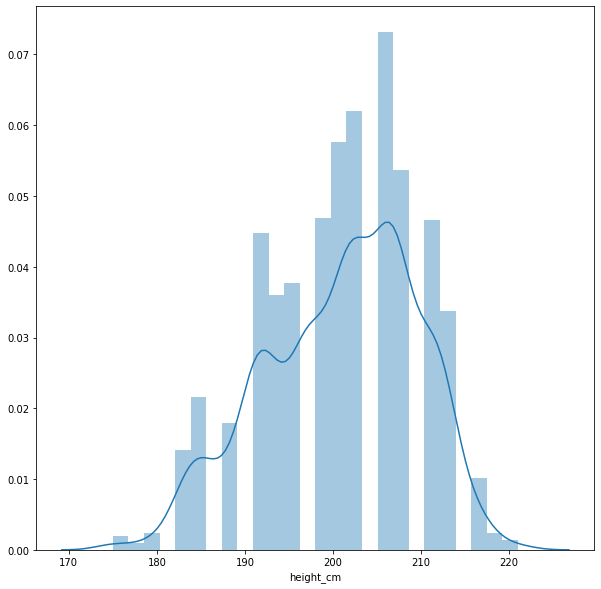

In [15]:
plt.subplots(figsize=(10,10))
sns.distplot(nba_regular['height_cm'])

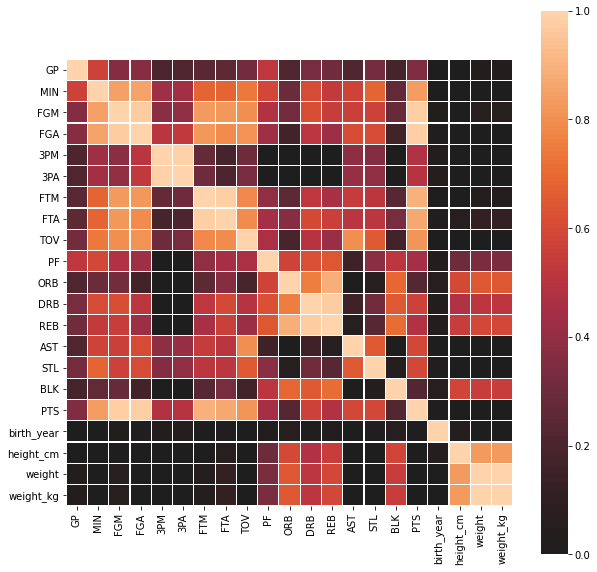

In [16]:
plt.subplots(figsize=(10,10))
sns.heatmap(nba_regular.corr(), vmax = 1, vmin = 0, center = 0, square = True, linewidths = .2, xticklabels=True, yticklabels=True)

In [17]:
#Grupisanje po timovima i prosek njihovih numerickih vrednosti
nba_timovi = nba_regular.groupby(['Team'])
nba_timovi_prosek = nba_timovi.mean()
nba_timovi_prosek

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg
Team,,,,,,,,,,,,,,,,,,,,,
ATL,71.602410,1859.936145,306.759036,662.493976,68.385542,189.265060,134.048193,176.373494,112.120482,146.180723,74.445783,252.120482,326.566265,193.759036,63.433735,38.530120,815.951807,1986.385542,200.469880,220.963855,100.240964
BOS,69.666667,1794.954444,291.888889,635.466667,65.855556,183.133333,133.833333,169.133333,100.444444,149.877778,68.400000,240.866667,309.266667,179.222222,59.633333,31.866667,783.466667,1987.077778,199.344444,224.111111,101.711111
BRK,73.203390,1839.647458,291.881356,641.254237,70.322034,197.593220,137.084746,181.050847,106.440678,148.508475,80.711864,246.135593,326.847458,164.101695,55.779661,34.118644,791.169492,1988.033898,201.288136,223.406780,101.389831
CHA,73.238806,1927.502985,298.895522,673.552239,69.134328,195.776119,147.761194,189.223881,99.044776,135.373134,71.552239,255.447761,327.000000,185.119403,56.671642,38.477612,814.686567,1988.686567,199.761194,219.626866,99.656716
CHI,70.412500,1809.420000,279.987500,619.375000,50.662500,140.962500,131.437500,171.937500,96.800000,138.362500,91.337500,251.925000,343.262500,162.475000,52.050000,39.900000,742.075000,1986.725000,201.925000,225.537500,102.237500
CLE,69.632911,1810.910127,293.962025,635.468354,71.772152,192.734177,136.291139,181.582278,101.582278,142.443038,83.683544,248.645570,332.329114,167.012658,50.569620,30.000000,795.987342,1986.936709,201.873418,226.518987,102.822785
DAL,72.888889,1857.632099,294.962963,647.666667,69.925926,195.246914,132.950617,168.728395,96.839506,141.629630,72.222222,245.604938,317.827160,176.283951,58.419753,31.580247,792.802469,1984.506173,200.172840,219.876543,99.703704
DEN,73.681159,1964.228986,330.275362,699.971014,72.695652,202.144928,155.420290,206.666667,113.855072,163.159420,92.811594,265.840580,358.652174,205.188406,63.695652,39.347826,888.666667,1988.159420,200.463768,220.014493,99.739130
DET,73.402778,1940.277778,308.652778,684.083333,61.291667,175.277778,131.375000,186.236111,102.763889,156.138889,103.277778,266.472222,369.750000,162.277778,58.541667,35.166667,809.972222,1988.472222,201.430556,228.291667,103.527778


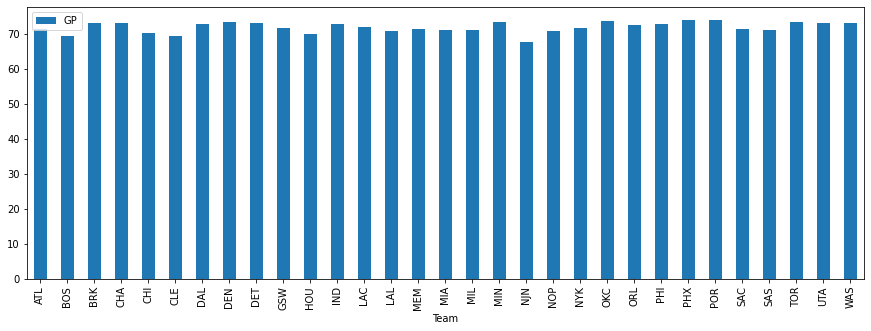

In [18]:
# Prikaz proseka odigranih utakmica u regularnom delu NBA lige po timovima
# Prema prikazanim podacima, mozemo zakljuciti da su timovi prilicno ujednaceni u odigranim utakmicama
nba_timovi_prosek.plot(kind='bar', y=['GP'], figsize=(15,5))
plt.show()

In [19]:
# Grupisanje data seta po igracima
# Grupisanje data seta po timovima
nba_igraci = nba_regular.groupby(['Player'], as_index=False)
nba_timovi = nba_regular.groupby(['Team'], as_index=False)
nba_igraci.mean()

,Player,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg
0,Aaron Brooks,75.250000,1813.725000,318.250000,757.250000,118.500000,303.500000,126.250000,151.750000,143.000000,156.750000,36.750000,110.750,147.500000,263.250000,50.00,12.750000,881.250000,1985.0,183.0,161.0,73.0
1,Aaron Gordon,73.500000,2175.725000,378.000000,838.750000,88.750000,274.500000,156.750000,222.000000,106.000000,152.000000,121.500000,364.250,485.750000,175.750000,60.00,49.000000,1001.500000,1995.0,206.0,220.0,100.0
2,Abdel Nader,54.500000,607.500000,70.500000,182.000000,27.500000,82.500000,25.000000,37.500000,30.000000,56.500000,13.500000,80.000,93.500000,23.000000,17.50,11.000000,193.500000,1993.0,198.0,225.0,102.0
3,Al Harrington,69.666667,1873.600000,358.000000,826.000000,119.333333,346.666667,148.333333,203.333333,116.666667,197.333333,78.666667,297.000,375.666667,99.666667,53.00,16.000000,983.666667,1980.0,206.0,245.0,111.0
4,Al Horford,74.750000,2462.212500,467.250000,889.750000,45.125000,121.750000,123.375000,160.750000,118.000000,158.375000,151.250000,457.125,608.375000,270.125000,60.75,89.875000,1103.000000,1986.0,208.0,245.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,Zach LaVine,74.000000,2122.033333,416.333333,923.666667,100.000000,268.000000,207.333333,251.666667,187.666667,163.666667,31.333333,214.000,245.333333,270.000000,61.00,17.666667,1140.000000,1995.0,196.0,208.0,94.0
651,Zach Lofton,1.000000,3.800000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,0.000000,1.00,0.000000,0.000000,1992.0,193.0,180.0,82.0
652,Zach Randolph,72.750000,2337.550000,495.000000,1039.000000,14.000000,53.125000,220.250000,289.000000,141.750000,170.875000,239.250000,483.750,723.000000,145.500000,56.25,20.000000,1224.250000,1981.0,206.0,260.0,118.0
653,Zaza Pachulia,71.375000,1353.125000,156.625000,322.500000,0.000000,2.125000,119.125000,157.375000,84.500000,166.500000,145.500000,266.625,412.125000,102.125000,49.75,23.875000,432.375000,1984.0,211.0,270.0,122.0


In [20]:
# for i in nba_cat.columns:
#   cat_num = nba_cat[i].value_counts()
#   chart = sns.barplot(x=cat_num.index, y=cat_num)
#   chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#   plt.show()

In [21]:
# 1. koji igrac je dao najvise poena
# 2. koji tim je postigao najvise poena
# 3. koji igrac je odigrao najvise utakmica
# 4. koji igrac je odigrao najvise minuta
# 5. procenat postignutih 3 poena u odnosu na pokusaje (po timovima)
# 6. procenat postignutih poena u odnosu na ukradene lopte (po timovima)
# 7. procenat postignutih poena u odnosu na asistencije (po timovima)
# 8. skokovi u odnosu na visinu igraca (po timovima)
# 9. postignuti poenu u odnosu na ofanzivne skokove

In [22]:
nba_regular.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


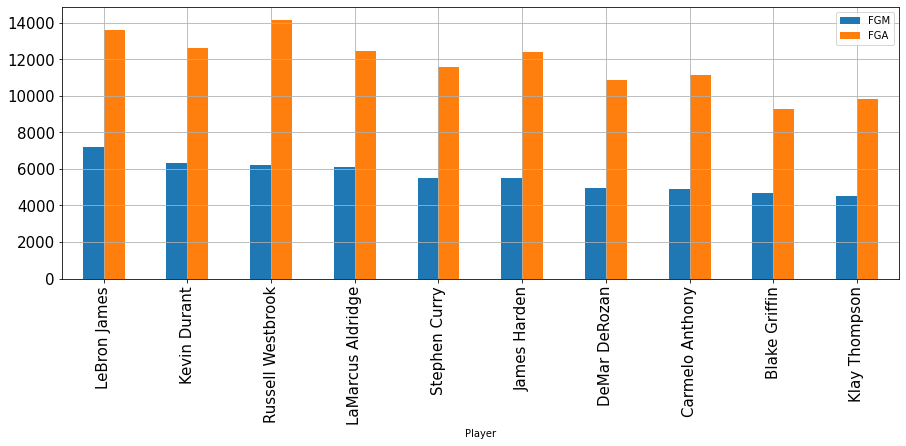

In [23]:
# Izdvajanje prvih 10 igraca sa najvise postignutih poena (FGM) sumiranih po svim sezonama, sortirani opadajuce 
# Njihov prikaz na grafiku (broj postignutih poena (FGM) u odnosu na broj pokusanih (FGA))
igraci_sa_najvise_poena = nba_igraci['Player', 'FGM', 'FGA'].sum().sort_values('FGM', ascending=False).head(10)
igraci_sa_najvise_poena.plot(x='Player', kind='bar', figsize=(15,5), grid=True, fontsize=15)
plt.show()

In [24]:
# Igrac sa najvise postignutih poena
igraci_sa_najvise_poena.iloc[0]

Player    LeBron James
FGM               7191
FGA              13602
Name: 393, dtype: object

In [25]:
# U dataset dodajemo kolonu '%' u prikazujemo procenat broj postignutih poena u odnosu na broj pokusanih izrazen u priocentima
igraci_sa_najvise_poena['%'] = round((igraci_sa_najvise_poena['FGM'] / igraci_sa_najvise_poena['FGA']) * 100, 2)
igraci_sa_najvise_poena.head(10).reset_index(drop=True)

,Player,FGM,FGA,%
0,LeBron James,7191,13602,52.87
1,Kevin Durant,6328,12636,50.08
2,Russell Westbrook,6190,14158,43.72
3,LaMarcus Aldridge,6125,12443,49.22
4,Stephen Curry,5504,11553,47.64
5,James Harden,5499,12411,44.31
6,DeMar DeRozan,4938,10855,45.49
7,Carmelo Anthony,4915,11147,44.09
8,Blake Griffin,4660,9281,50.21
9,Klay Thompson,4512,9823,45.93


In [26]:
# Sortiranje igraca koji imaju najbolji procenat suta u NBA ligi
igraci_sa_najvise_poena.sort_values('%', ascending=False).reset_index(drop=True)

,Player,FGM,FGA,%
0,LeBron James,7191,13602,52.87
1,Blake Griffin,4660,9281,50.21
2,Kevin Durant,6328,12636,50.08
3,LaMarcus Aldridge,6125,12443,49.22
4,Stephen Curry,5504,11553,47.64
5,Klay Thompson,4512,9823,45.93
6,DeMar DeRozan,4938,10855,45.49
7,James Harden,5499,12411,44.31
8,Carmelo Anthony,4915,11147,44.09
9,Russell Westbrook,6190,14158,43.72


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


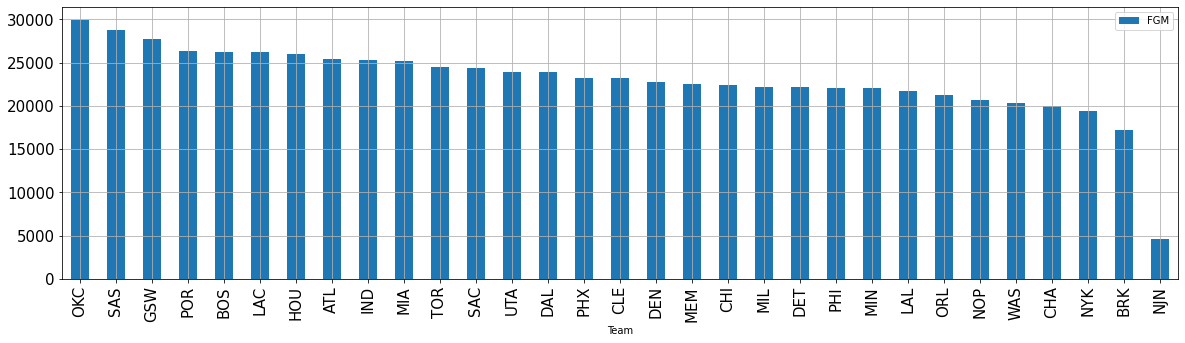

In [27]:
#Prikaz timova NBA lige koji su postigli najvise poena
timovi_sa_najvise_poena = nba_timovi['Team', 'FGM'].sum().sort_values('FGM', ascending=False)
timovi_sa_najvise_poena.plot(x='Team', kind='bar', figsize=(20,5), grid=True, fontsize=15)
plt.show()

In [28]:
# Suma odigranih utakmica i minuta igraca u NBA ligi
ukupno_minuta_utakmica = nba_igraci['GP', 'MIN'].sum().sort_values(by=['Player', 'GP', 'MIN']).reset_index(drop=True).set_index('Player')
ukupno_minuta_utakmica

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,GP,MIN
Player,,
Aaron Brooks,301,7254.9
Aaron Gordon,294,8702.9
Abdel Nader,109,1215.0
Al Harrington,209,5620.8
Al Horford,598,19697.7
...,...,...
Zach LaVine,222,6366.1
Zach Lofton,1,3.8
Zach Randolph,582,18700.4


In [29]:
# Dodavanje nove kolone 'Prosek minuta', i proracun proseka minuta po igracu u NBA ligi
ukupno_minuta_utakmica['Prosek minuta'] = round(ukupno_minuta_utakmica['MIN'] / ukupno_minuta_utakmica['GP'], 2)
ukupno_minuta_utakmica = ukupno_minuta_utakmica.sort_values('Prosek minuta', ascending=False)
ukupno_minuta_utakmica

,GP,MIN,Prosek minuta
Player,,,
Kobe Bryant,291,10858.9,37.32
LeBron James,726,27093.6,37.32
Brandon Roy,65,2418.5,37.21
Kevin Durant,668,24738.6,37.03
Luol Deng,427,15704.8,36.78
...,...,...,...
Georges Niang,59,516.3,8.75
Sasha Vujacic,67,574.9,8.58
Cole Aldrich,62,531.0,8.56


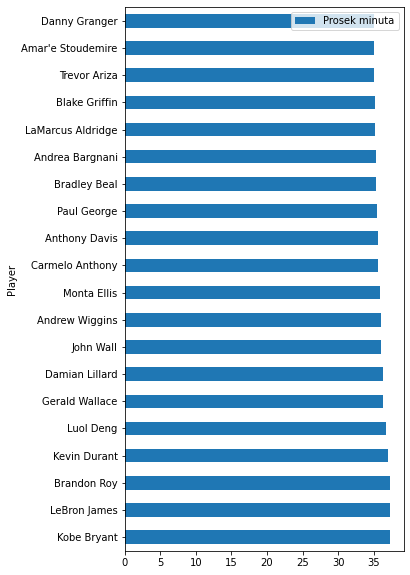

In [30]:
ukupno_minuta_utakmica.head(20).plot(y='Prosek minuta', kind='barh', figsize=(5, 10))
plt.show()

In [31]:
ukupno_minuta_utakmica.loc['Nikola Jokic']

GP                308.0
MIN              8715.0
Prosek minuta      28.3
Name: Nikola Jokic, dtype: float64

In [32]:
# NBA timovi sa najboljim procentum suta za 3 poena, sortirani opadajuce
timovi_sa_najvise_trojki = nba_timovi['Team', '3PM', '3PA'].sum()
timovi_sa_najvise_trojki['%'] = round((timovi_sa_najvise_trojki['3PM'] / timovi_sa_najvise_trojki['3PA']) * 100, 2)
timovi_sa_najvise_trojki.sort_values('%', ascending=False).reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Team,3PM,3PA,%
0,GSW,7443,18818,39.55
1,SAS,5996,15711,38.16
2,CLE,5670,15226,37.24
3,IND,5061,13769,36.76
4,LAC,5650,15373,36.75
5,WAS,4241,11608,36.54
6,SAC,4562,12510,36.47
7,MIA,5143,14167,36.30
8,NYK,4373,12082,36.19
9,HOU,7698,21290,36.16


In [32]:
# Koliko poena daju u proseku timovi po utakmicama